In [1]:
from utils import *
import scipy


In [6]:
preds = []
exp_name= "nn_massive_2dconvlstm"
for p in os.listdir("cache/{}/".format(exp_name)):
    loss =  float(p.split("-")[-1][:5])
#     if not "3-0" in p:#loss < 0.09:
#         continue
    print p
        
    preds.append(np.load("cache/{}/{}".format(exp_name,p)))  
        

predictions_freqconvs1d_8_51_3_173_183_0.25_72_3-0.0996399012933.npy
predictions_freqconvs1d_7_63_3_180_145_0.30_77_3-0.10206483749.npy
predictions_freqconvs1d_8_60_3_196_152_0.24_92_2-0.116883278354.npy
predictions_freqconvs1d_8_57_3_130_151_0.29_92_1-0.125770319626.npy
predictions_freqconvs1d_9_45_3_170_172_0.23_117_3-0.0941048009355.npy
predictions_freqconvs1d_9_47_3_166_180_0.28_101_2-0.0991737373303.npy
predictions_freqconvs1d_9_42_2_194_173_0.27_120_3-0.114463884747.npy
predictions_freqconvs1d_8_63_3_173_143_0.30_72_3-0.105653040254.npy
predictions_freqconvs1d_7_33_3_159_188_0.29_104_3-0.0973006736766.npy
predictions_freqconvs1d_7_47_2_139_174_0.23_95_2-0.136381656819.npy
predictions_freqconvs1d_9_33_3_148_197_0.29_84_2-0.107463196739.npy
predictions_freqconvs1d_9_53_2_190_149_0.29_87_3-0.110806304283.npy
predictions_freqconvs1d_7_62_3_153_188_0.24_124_1-0.132502203663.npy


In [7]:
len(preds)

13

In [7]:
conv1dblend=np.load("cache/predictions_frqmaxpool256_plus_longblend1.npy")

In [8]:
conv2d_256=np.load("cache/predictions_conv2d_wlstm.npy")

In [9]:
conv2d_128 = np.load("cache/predictions_conv2d_wlstm_on_64x128_kernel5x7.npy")


In [12]:
best_blend = np.load("cache/predictions_conv2dlstm_plus_longblend1.npy")


In [22]:
predictions = np.mean([conv1dblend,conv2d_256,conv2d_128],axis=0)

In [30]:
np.save("cache/predictions_conv2d_128_n_256_plus_1dconvensemble.npy",predictions)

In [23]:
classes = np.argmax(predictions, axis=1)

In [24]:
(classes != np.argmax(best_blend, axis=1)).sum()

4288

(array([12106.,  5982.,  5465.,  6486.,  5747.,  6247.,  6789.,  5802.,
         5750., 98164.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

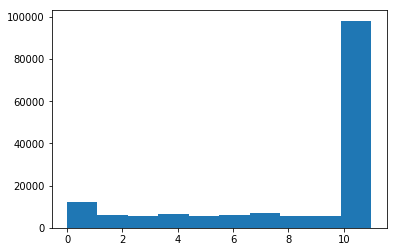

In [25]:
plt.hist(classes,bins=10)

In [12]:
plt.hist(classes,bins=10)

(array([ 12004.,   5908.,   5609.,   6549.,   5711.,   6283.,   6505.,
          5783.,   5894.,  98292.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

In [8]:
plt.hist(classes,bins=10)

(array([ 12528.,   5839.,   5328.,   6245.,   5689.,   6509.,   6553.,
          5613.,   5599.,  98635.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

In [46]:
plt.hist(classes,bins=10)

(array([ 12558.,   5750.,   5475.,   6201.,   5803.,   6507.,   6886.,
          5816.,   5804.,  97738.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

In [19]:
plt.hist(classes,bins=10)

(array([ 12394.,   6282.,   5300.,   6231.,   5642.,   6381.,   6483.,
          5548.,   5569.,  98708.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

In [10]:
plt.hist(classes,bins=10)

(array([ 12435.,   6745.,   5424.,   6269.,   5763.,   6397.,   6935.,
          5690.,   5718.,  97162.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

In [26]:
test_paths = glob(os.path.join('./data/', 'test/audio/*wav'))

In [31]:
POSSIBLE_LABELS = 'yes no up down left right on off stop go silence unknown'.split()
id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS)}
name2id = {name: i for i, name in id2name.items()}
len(id2name)

12

In [32]:
submission = dict()
for i in range(len(test_paths)):
    fname, label = os.path.basename(test_paths[i]), id2name[classes[i]]
    submission[fname] = label

In [33]:
# timeconvlstm-2xunk_plus_blend2_87
with open('subm/{}.csv'.format("conv2d_128_n_256_plus_1dconvensemble"), 'w') as fout: #_blend_conv1dlstm_and_aebased_conv2d_finetuned
    fout.write('fname,label\n')
    for fname, label in submission.items():
        fout.write('{},{}\n'.format(fname, label))

In [34]:
from IPython.lib.display import FileLink

FileLink('subm/{}.csv'.format("conv2d_128_n_256_plus_1dconvensemble"))


/home/ubuntu/keyword_spotting/subm/conv2d_128_n_256_plus_1dconvensemble.csv

### create logits


In [19]:
test_preds = np.load("cache/predictions_frqmaxpool256_plus_longblend1.npy")


In [20]:
classes = np.argmax(test_preds, axis=1)

In [21]:

test_preds = scipy.special.logit(test_preds)

In [22]:
class_labels = []

for i in range(len(test_paths)):
    class_labels.append(id2name[classes[i]])
    


In [23]:
test_file_names = []
for i in range(len(test_paths)):
    test_file_names.append(os.path.basename(test_paths[i]))


In [24]:
logits = pd.concat([pd.DataFrame(data=test_file_names,columns=["fname"]) ,
                    pd.DataFrame(data=class_labels,columns=["label"]), 
           pd.DataFrame(data = test_preds, columns=POSSIBLE_LABELS)],axis=1)

In [25]:
logits.tail()

,fname,label,yes,no,up,down,left,right,on,off,stop,go,silence,unknown
158533,clip_46e677bad.wav,off,-17.883478,-21.249763,-12.713349,-21.058153,-15.936786,-14.514083,-4.806983,4.768320,-15.348779,-19.979322,-26.929863,-8.068913
158534,clip_13f4f3999.wav,off,-15.249692,-17.718536,-11.080694,-19.296045,-12.004621,-14.046903,-8.365038,7.689873,-13.875666,-17.927799,-24.729733,-8.512548
158535,clip_74cb41418.wav,unknown,-1.910422,-3.078889,-7.269076,-4.086558,-3.981898,-4.756974,-6.770249,-5.908035,-7.388863,-3.725363,-10.148592,1.125390
158536,clip_ffac8a06e.wav,on,-14.398467,-14.194149,-12.014897,-9.314014,-14.595246,-10.409236,3.590081,-8.156230,-14.061340,-11.908450,-20.673233,-3.606370
158537,clip_c6798b35f.wav,no,-5.837054,0.657193,-7.522390,-3.525701,-6.148783,-6.430878,-5.568509,-7.185807,-6.772242,-1.738820,-11.917267,-1.731314


In [26]:
logits.to_csv("cache/armin_logits_1dconv_ensemble_87.csv",index=False)